<a href="https://colab.research.google.com/github/rudysemola/AutoCL-materials/blob/main/FLAML_automl_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AutoML with FLAML Library
NOTE: all automl

## 1. Introduction

FLAML is a Python library (https://github.com/microsoft/FLAML) designed to automatically produce accurate machine learning models 
with low computational cost. It is fast and economical. The simple and lightweight design makes it easy to use and extend, such as adding new learners. FLAML can 
- serve as an economical AutoML engine,
- be used as a fast hyperparameter tuning tool, or 
- be embedded in self-tuning software that requires low latency & resource in repetitive
   tuning tasks.

In this notebook, we use a binary classification task to showcase the task-oriented AutoML in FLAML library.

FLAML requires `Python>=3.7`. To run this notebook example, please install flaml with the `notebook` option:
```bash
pip install flaml[notebook]
```

In [ ]:
%pip install flaml[notebook]==1.1.1

## 2. Classification Example
### Load data and preprocess

Download [Airlines dataset](https://www.openml.org/d/1169) from OpenML. The task is to predict whether a given flight will be delayed, given the information of the scheduled departure.

In [2]:
from flaml.data import load_openml_dataset

X_train, X_test, y_train, y_test = load_openml_dataset(dataset_id=1169, data_dir='./')

download dataset from openml


DEBUG:openml.datasets.dataset:Saved dataset 1169: airlines to file /root/.openml/cache/org/openml/www/datasets/1169/dataset.pkl.py3


Dataset name: airlines
X_train.shape: (404537, 7), y_train.shape: (404537,);
X_test.shape: (134846, 7), y_test.shape: (134846,)


In [3]:
X_train.head()

,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length
249392,EV,5309.0,MDT,ATL,3,794.0,131.0
166918,CO,1079.0,IAH,SAT,5,900.0,60.0
89110,US,1636.0,CLE,CLT,1,530.0,103.0
70258,WN,928.0,CMH,LAS,7,480.0,280.0
492985,WN,729.0,GEG,LAS,3,630.0,140.0


### Run FLAML
In the FLAML automl run configuration, users can specify the task type, time budget, error metric, learner list, whether to subsample, resampling strategy type, and so on. All these arguments have default values which will be used if users do not provide them. For example, the default classifiers are `['lgbm', 'xgboost', 'xgb_limitdepth', 'catboost', 'rf', 'extra_tree', 'lrl1']`. 

In [4]:
''' import AutoML class from flaml package '''
from flaml import AutoML

automl = AutoML()

In [5]:
settings = {
    "time_budget": 600,  # total running time in seconds
    "metric": 'accuracy', 
                        # check the documentation for options of metrics (https://microsoft.github.io/FLAML/docs/Use-Cases/Task-Oriented-AutoML#optimization-metric)
    "task": 'classification',  # task type
    "log_file_name": 'airlines_experiment.log',  # flaml log file
    "seed": 7654321,    # random seed
}


In [6]:
'''The main flaml automl API'''
automl.fit(X_train=X_train, y_train=y_train, **settings)

[flaml.automl.automl: 03-02 15:17:10] {2715} INFO - task = classification
[flaml.automl.automl: 03-02 15:17:10] {2717} INFO - Data split method: stratified
[flaml.automl.automl: 03-02 15:17:10] {2720} INFO - Evaluation method: holdout
[flaml.automl.automl: 03-02 15:17:10] {2847} INFO - Minimizing error metric: 1-accuracy
[flaml.automl.automl: 03-02 15:17:10] {2993} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth', 'lrl1']
[flaml.automl.automl: 03-02 15:17:10] {3322} INFO - iteration 0, current learner lgbm
[flaml.automl.automl: 03-02 15:17:10] {3460} INFO - Estimated sufficient time budget=17073s. Estimated necessary time budget=394s.
[flaml.automl.automl: 03-02 15:17:10] {3507} INFO -  at 0.6s,	estimator lgbm's best error=0.3777,	best estimator lgbm's best error=0.3777
[flaml.automl.automl: 03-02 15:17:10] {3322} INFO - iteration 1, current learner lgbm
[flaml.automl.automl: 03-02 15:17:11] {3507} INFO -  at 0.7s,	estimator lgbm's best

/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.automl: 03-02 15:17:11] {3507} INFO -  at 1.4s,	estimator xgboost's best error=0.3787,	best estimator lgbm's best error=0.3614
[flaml.automl.automl: 03-02 15:17:11] {3322} INFO - iteration 4, current learner extra_tree
[flaml.automl.automl: 03-02 15:17:11] {3507} INFO -  at 1.5s,	estimator extra_tree's best error=0.3787,	best estimator lgbm's best error=0.3614
[flaml.automl.automl: 03-02 15:17:11] {3322} INFO - iteration 5, current learner lgbm
[flaml.automl.automl: 03-02 15:17:11] {3507} INFO -  at 1.6s,	estimator lgbm's best error=0.3614,	best estimator lgbm's best error=0.3614
[flaml.automl.automl: 03-02 15:17:11] {3322} INFO - iteration 6, current learner xgboost
[flaml.automl.automl: 03-02 15:17:11] {3507} INFO -  at 1.7s,	estimator xgboost's best error=0.3746,	best estimator lgbm's best error=0.3614
[flaml.automl.automl: 03-02 15:17:11] {3322} INFO - iteration 7, current learner lgbm
[flaml.automl.automl: 03-02 15:17:12] {3507} INFO -  at 1.8s,	estimator lgbm's best

/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.automl: 03-02 15:17:12] {3507} INFO -  at 1.9s,	estimator lgbm's best error=0.3614,	best estimator lgbm's best error=0.3614
[flaml.automl.automl: 03-02 15:17:12] {3322} INFO - iteration 9, current learner xgboost
[flaml.automl.automl: 03-02 15:17:12] {3507} INFO -  at 2.0s,	estimator xgboost's best error=0.3699,	best estimator lgbm's best error=0.3614
[flaml.automl.automl: 03-02 15:17:12] {3322} INFO - iteration 10, current learner extra_tree
[flaml.automl.automl: 03-02 15:17:12] {3507} INFO -  at 2.1s,	estimator extra_tree's best error=0.3787,	best estimator lgbm's best error=0.3614
[flaml.automl.automl: 03-02 15:17:12] {3322} INFO - iteration 11, current learner extra_tree


/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.automl: 03-02 15:17:12] {3507} INFO -  at 2.2s,	estimator extra_tree's best error=0.3787,	best estimator lgbm's best error=0.3614
[flaml.automl.automl: 03-02 15:17:12] {3322} INFO - iteration 12, current learner rf
[flaml.automl.automl: 03-02 15:17:12] {3507} INFO -  at 2.2s,	estimator rf's best error=0.3816,	best estimator lgbm's best error=0.3614
[flaml.automl.automl: 03-02 15:17:12] {3322} INFO - iteration 13, current learner rf
[flaml.automl.automl: 03-02 15:17:12] {3507} INFO -  at 2.3s,	estimator rf's best error=0.3791,	best estimator lgbm's best error=0.3614
[flaml.automl.automl: 03-02 15:17:12] {3322} INFO - iteration 14, current learner rf
[flaml.automl.automl: 03-02 15:17:12] {3507} INFO -  at 2.4s,	estimator rf's best error=0.3791,	best estimator lgbm's best error=0.3614
[flaml.automl.automl: 03-02 15:17:12] {3322} INFO - iteration 15, current learner xgboost
[flaml.automl.automl: 03-02 15:17:12] {3507} INFO -  at 2.6s,	estimator xgboost's best error=0.3596,	be

/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.automl: 03-02 15:17:13] {3507} INFO -  at 2.8s,	estimator lgbm's best error=0.3614,	best estimator xgboost's best error=0.3596
[flaml.automl.automl: 03-02 15:17:13] {3322} INFO - iteration 17, current learner xgboost
[flaml.automl.automl: 03-02 15:17:13] {3507} INFO -  at 2.8s,	estimator xgboost's best error=0.3596,	best estimator xgboost's best error=0.3596
[flaml.automl.automl: 03-02 15:17:13] {3322} INFO - iteration 18, current learner lgbm
[flaml.automl.automl: 03-02 15:17:13] {3507} INFO -  at 3.0s,	estimator lgbm's best error=0.3614,	best estimator xgboost's best error=0.3596
[flaml.automl.automl: 03-02 15:17:13] {3322} INFO - iteration 19, current learner xgboost


/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.automl: 03-02 15:17:13] {3507} INFO -  at 3.1s,	estimator xgboost's best error=0.3596,	best estimator xgboost's best error=0.3596
[flaml.automl.automl: 03-02 15:17:13] {3322} INFO - iteration 20, current learner rf
[flaml.automl.automl: 03-02 15:17:13] {3507} INFO -  at 3.2s,	estimator rf's best error=0.3791,	best estimator xgboost's best error=0.3596
[flaml.automl.automl: 03-02 15:17:13] {3322} INFO - iteration 21, current learner xgboost


/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.automl: 03-02 15:17:13] {3507} INFO -  at 3.6s,	estimator xgboost's best error=0.3586,	best estimator xgboost's best error=0.3586
[flaml.automl.automl: 03-02 15:17:13] {3322} INFO - iteration 22, current learner lgbm
[flaml.automl.automl: 03-02 15:17:14] {3507} INFO -  at 3.8s,	estimator lgbm's best error=0.3550,	best estimator lgbm's best error=0.3550
[flaml.automl.automl: 03-02 15:17:14] {3322} INFO - iteration 23, current learner lgbm
[flaml.automl.automl: 03-02 15:17:14] {3507} INFO -  at 3.9s,	estimator lgbm's best error=0.3550,	best estimator lgbm's best error=0.3550
[flaml.automl.automl: 03-02 15:17:14] {3322} INFO - iteration 24, current learner rf
[flaml.automl.automl: 03-02 15:17:14] {3507} INFO -  at 4.0s,	estimator rf's best error=0.3789,	best estimator lgbm's best error=0.3550
[flaml.automl.automl: 03-02 15:17:14] {3322} INFO - iteration 25, current learner xgboost
[flaml.automl.automl: 03-02 15:17:14] {3507} INFO -  at 4.2s,	estimator xgboost's best error=0.

/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.automl: 03-02 15:17:14] {3322} INFO - iteration 26, current learner lgbm
[flaml.automl.automl: 03-02 15:17:14] {3507} INFO -  at 4.6s,	estimator lgbm's best error=0.3545,	best estimator lgbm's best error=0.3545
[flaml.automl.automl: 03-02 15:17:14] {3322} INFO - iteration 27, current learner lgbm
[flaml.automl.automl: 03-02 15:17:15] {3507} INFO -  at 4.9s,	estimator lgbm's best error=0.3545,	best estimator lgbm's best error=0.3545
[flaml.automl.automl: 03-02 15:17:15] {3322} INFO - iteration 28, current learner xgboost


/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.automl: 03-02 15:17:15] {3507} INFO -  at 5.4s,	estimator xgboost's best error=0.3561,	best estimator lgbm's best error=0.3545
[flaml.automl.automl: 03-02 15:17:15] {3322} INFO - iteration 29, current learner xgboost


/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.automl: 03-02 15:17:16] {3507} INFO -  at 5.8s,	estimator xgboost's best error=0.3561,	best estimator lgbm's best error=0.3545
[flaml.automl.automl: 03-02 15:17:16] {3322} INFO - iteration 30, current learner lgbm
[flaml.automl.automl: 03-02 15:17:16] {3507} INFO -  at 6.5s,	estimator lgbm's best error=0.3545,	best estimator lgbm's best error=0.3545
[flaml.automl.automl: 03-02 15:17:16] {3322} INFO - iteration 31, current learner lgbm
[flaml.automl.automl: 03-02 15:17:17] {3507} INFO -  at 6.8s,	estimator lgbm's best error=0.3536,	best estimator lgbm's best error=0.3536
[flaml.automl.automl: 03-02 15:17:17] {3322} INFO - iteration 32, current learner lgbm
[flaml.automl.automl: 03-02 15:17:17] {3507} INFO -  at 7.2s,	estimator lgbm's best error=0.3536,	best estimator lgbm's best error=0.3536
[flaml.automl.automl: 03-02 15:17:17] {3322} INFO - iteration 33, current learner xgboost


/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.automl: 03-02 15:17:20] {3507} INFO -  at 10.7s,	estimator xgboost's best error=0.3561,	best estimator lgbm's best error=0.3536
[flaml.automl.automl: 03-02 15:17:20] {3322} INFO - iteration 34, current learner lgbm
[flaml.automl.automl: 03-02 15:17:21] {3507} INFO -  at 11.7s,	estimator lgbm's best error=0.3536,	best estimator lgbm's best error=0.3536
[flaml.automl.automl: 03-02 15:17:21] {3322} INFO - iteration 35, current learner lgbm
[flaml.automl.automl: 03-02 15:17:23] {3507} INFO -  at 13.6s,	estimator lgbm's best error=0.3528,	best estimator lgbm's best error=0.3528
[flaml.automl.automl: 03-02 15:17:23] {3322} INFO - iteration 36, current learner xgb_limitdepth
[flaml.automl.automl: 03-02 15:17:24] {3507} INFO -  at 13.7s,	estimator xgb_limitdepth's best error=0.3630,	best estimator lgbm's best error=0.3528
[flaml.automl.automl: 03-02 15:17:24] {3322} INFO - iteration 37, current learner xgb_limitdepth
[flaml.automl.automl: 03-02 15:17:24] {3507} INFO -  at 13.8s,	

/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.automl: 03-02 15:17:24] {3507} INFO -  at 14.2s,	estimator xgb_limitdepth's best error=0.3630,	best estimator lgbm's best error=0.3528
[flaml.automl.automl: 03-02 15:17:24] {3322} INFO - iteration 39, current learner xgb_limitdepth


/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.automl: 03-02 15:17:24] {3507} INFO -  at 14.6s,	estimator xgb_limitdepth's best error=0.3630,	best estimator lgbm's best error=0.3528
[flaml.automl.automl: 03-02 15:17:24] {3322} INFO - iteration 40, current learner xgb_limitdepth


/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.automl: 03-02 15:17:25] {3507} INFO -  at 14.8s,	estimator xgb_limitdepth's best error=0.3572,	best estimator lgbm's best error=0.3528
[flaml.automl.automl: 03-02 15:17:25] {3322} INFO - iteration 41, current learner xgb_limitdepth
[flaml.automl.automl: 03-02 15:17:25] {3507} INFO -  at 15.0s,	estimator xgb_limitdepth's best error=0.3572,	best estimator lgbm's best error=0.3528
[flaml.automl.automl: 03-02 15:17:25] {3322} INFO - iteration 42, current learner xgb_limitdepth


/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.automl: 03-02 15:17:25] {3507} INFO -  at 15.5s,	estimator xgb_limitdepth's best error=0.3572,	best estimator lgbm's best error=0.3528
[flaml.automl.automl: 03-02 15:17:25] {3322} INFO - iteration 43, current learner lgbm
[flaml.automl.automl: 03-02 15:17:29] {3507} INFO -  at 19.5s,	estimator lgbm's best error=0.3405,	best estimator lgbm's best error=0.3405
[flaml.automl.automl: 03-02 15:17:29] {3322} INFO - iteration 44, current learner xgb_limitdepth
[flaml.automl.automl: 03-02 15:17:29] {3507} INFO -  at 19.7s,	estimator xgb_limitdepth's best error=0.3572,	best estimator lgbm's best error=0.3405
[flaml.automl.automl: 03-02 15:17:29] {3322} INFO - iteration 45, current learner xgb_limitdepth


/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.automl: 03-02 15:17:31] {3507} INFO -  at 20.8s,	estimator xgb_limitdepth's best error=0.3572,	best estimator lgbm's best error=0.3405
[flaml.automl.automl: 03-02 15:17:31] {3322} INFO - iteration 46, current learner rf
[flaml.automl.automl: 03-02 15:17:31] {3507} INFO -  at 21.0s,	estimator rf's best error=0.3781,	best estimator lgbm's best error=0.3405
[flaml.automl.automl: 03-02 15:17:31] {3322} INFO - iteration 47, current learner lgbm
[flaml.automl.automl: 03-02 15:17:33] {3507} INFO -  at 23.3s,	estimator lgbm's best error=0.3405,	best estimator lgbm's best error=0.3405
[flaml.automl.automl: 03-02 15:17:33] {3322} INFO - iteration 48, current learner rf
[flaml.automl.automl: 03-02 15:17:33] {3507} INFO -  at 23.4s,	estimator rf's best error=0.3781,	best estimator lgbm's best error=0.3405
[flaml.automl.automl: 03-02 15:17:33] {3322} INFO - iteration 49, current learner lgbm
[flaml.automl.automl: 03-02 15:17:37] {3507} INFO -  at 27.1s,	estimator lgbm's best error=0.3

/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.automl: 03-02 15:17:45] {3507} INFO -  at 34.8s,	estimator xgb_limitdepth's best error=0.3532,	best estimator lgbm's best error=0.3370
[flaml.automl.automl: 03-02 15:17:45] {3322} INFO - iteration 52, current learner lgbm
[flaml.automl.automl: 03-02 15:17:48] {3507} INFO -  at 38.0s,	estimator lgbm's best error=0.3370,	best estimator lgbm's best error=0.3370
[flaml.automl.automl: 03-02 15:17:48] {3322} INFO - iteration 53, current learner lgbm
[flaml.automl.automl: 03-02 15:17:52] {3507} INFO -  at 42.4s,	estimator lgbm's best error=0.3318,	best estimator lgbm's best error=0.3318
[flaml.automl.automl: 03-02 15:17:52] {3322} INFO - iteration 54, current learner lrl1


INFO:flaml.tune.searcher.blendsearch:No low-cost partial config given to the search algorithm. For cost-frugal search, consider providing low-cost values for cost-related hps via 'low_cost_partial_config'. More info can be found at https://microsoft.github.io/FLAML/docs/FAQ#about-low_cost_partial_config-in-tune
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.automl: 03-02 15:17:52] {3507} INFO -  at 42.6s,	estimator lrl1's best error=0.4339,	best estimator lgbm's best error=0.3318
[flaml.automl.automl: 03-02 15:17:52] {3322} INFO - iteration 55, current learner lrl1
[flaml.automl.automl: 03-02 15:17:53] {3507} INFO -  at 42.9s,	estimator lrl1's best error=0.4337,	best estimator lgbm's best error=0.3318
[flaml.automl.automl: 03-02 15:17:53] {3322} INFO - iteration 56, current learner lgbm


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.automl: 03-02 15:17:58] {3507} INFO -  at 48.4s,	estimator lgbm's best error=0.3282,	best estimator lgbm's best error=0.3282
[flaml.automl.automl: 03-02 15:17:58] {3322} INFO - iteration 57, current learner lgbm
[flaml.automl.automl: 03-02 15:18:03] {3507} INFO -  at 52.9s,	estimator lgbm's best error=0.3282,	best estimator lgbm's best error=0.3282
[flaml.automl.automl: 03-02 15:18:03] {3322} INFO - iteration 58, current learner lgbm
[flaml.automl.automl: 03-02 15:18:07] {3507} INFO -  at 56.7s,	estimator lgbm's best error=0.3282,	best estimator lgbm's best error=0.3282
[flaml.automl.automl: 03-02 15:18:07] {3322} INFO - iteration 59, current learner lgbm
[flaml.automl.automl: 03-02 15:18:13] {3507} INFO -  at 62.8s,	estimator lgbm's best error=0.3282,	best estimator lgbm's best error=0.3282
[flaml.automl.automl: 03-02 15:18:13] {3322} INFO - iteration 60, current learner lgbm
[flaml.automl.automl: 03-02 15:18:17] {3507} INFO -  at 67.1s,	estimator lgbm's best error=0.328

/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.automl: 03-02 15:18:36] {3507} INFO -  at 85.9s,	estimator xgboost's best error=0.3555,	best estimator lgbm's best error=0.3282
[flaml.automl.automl: 03-02 15:18:36] {3322} INFO - iteration 73, current learner rf
[flaml.automl.automl: 03-02 15:18:36] {3507} INFO -  at 86.0s,	estimator rf's best error=0.3706,	best estimator lgbm's best error=0.3282
[flaml.automl.automl: 03-02 15:18:36] {3322} INFO - iteration 74, current learner xgb_limitdepth


/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.automl: 03-02 15:18:37] {3507} INFO -  at 87.3s,	estimator xgb_limitdepth's best error=0.3532,	best estimator lgbm's best error=0.3282
[flaml.automl.automl: 03-02 15:18:37] {3322} INFO - iteration 75, current learner rf
[flaml.automl.automl: 03-02 15:18:37] {3507} INFO -  at 87.6s,	estimator rf's best error=0.3678,	best estimator lgbm's best error=0.3282
[flaml.automl.automl: 03-02 15:18:37] {3322} INFO - iteration 76, current learner xgb_limitdepth


/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.automl: 03-02 15:18:41] {3507} INFO -  at 91.2s,	estimator xgb_limitdepth's best error=0.3442,	best estimator lgbm's best error=0.3282
[flaml.automl.automl: 03-02 15:18:41] {3322} INFO - iteration 77, current learner lgbm
[flaml.automl.automl: 03-02 15:19:00] {3507} INFO -  at 110.6s,	estimator lgbm's best error=0.3282,	best estimator lgbm's best error=0.3282
[flaml.automl.automl: 03-02 15:19:00] {3322} INFO - iteration 78, current learner lgbm
[flaml.automl.automl: 03-02 15:19:02] {3507} INFO -  at 112.1s,	estimator lgbm's best error=0.3282,	best estimator lgbm's best error=0.3282
[flaml.automl.automl: 03-02 15:19:02] {3322} INFO - iteration 79, current learner xgb_limitdepth


/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.automl: 03-02 15:19:05] {3507} INFO -  at 115.4s,	estimator xgb_limitdepth's best error=0.3442,	best estimator lgbm's best error=0.3282
[flaml.automl.automl: 03-02 15:19:05] {3322} INFO - iteration 80, current learner rf
[flaml.automl.automl: 03-02 15:19:05] {3507} INFO -  at 115.5s,	estimator rf's best error=0.3678,	best estimator lgbm's best error=0.3282
[flaml.automl.automl: 03-02 15:19:05] {3322} INFO - iteration 81, current learner lgbm
[flaml.automl.automl: 03-02 15:19:37] {3507} INFO -  at 147.5s,	estimator lgbm's best error=0.3282,	best estimator lgbm's best error=0.3282
[flaml.automl.automl: 03-02 15:19:37] {3322} INFO - iteration 82, current learner xgb_limitdepth


/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.automl: 03-02 15:19:40] {3507} INFO -  at 150.2s,	estimator xgb_limitdepth's best error=0.3386,	best estimator lgbm's best error=0.3282
[flaml.automl.automl: 03-02 15:19:40] {3322} INFO - iteration 83, current learner rf
[flaml.automl.automl: 03-02 15:19:40] {3507} INFO -  at 150.6s,	estimator rf's best error=0.3617,	best estimator lgbm's best error=0.3282
[flaml.automl.automl: 03-02 15:19:40] {3322} INFO - iteration 84, current learner rf
[flaml.automl.automl: 03-02 15:19:41] {3507} INFO -  at 151.0s,	estimator rf's best error=0.3593,	best estimator lgbm's best error=0.3282
[flaml.automl.automl: 03-02 15:19:41] {3322} INFO - iteration 85, current learner xgb_limitdepth


/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.automl: 03-02 15:19:44] {3507} INFO -  at 153.8s,	estimator xgb_limitdepth's best error=0.3386,	best estimator lgbm's best error=0.3282
[flaml.automl.automl: 03-02 15:19:44] {3322} INFO - iteration 86, current learner xgb_limitdepth


/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.automl: 03-02 15:19:47] {3507} INFO -  at 157.6s,	estimator xgb_limitdepth's best error=0.3386,	best estimator lgbm's best error=0.3282
[flaml.automl.automl: 03-02 15:19:47] {3322} INFO - iteration 87, current learner rf
[flaml.automl.automl: 03-02 15:19:48] {3507} INFO -  at 158.0s,	estimator rf's best error=0.3593,	best estimator lgbm's best error=0.3282
[flaml.automl.automl: 03-02 15:19:48] {3322} INFO - iteration 88, current learner xgb_limitdepth


/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.automl: 03-02 15:19:51] {3507} INFO -  at 161.0s,	estimator xgb_limitdepth's best error=0.3352,	best estimator lgbm's best error=0.3282
[flaml.automl.automl: 03-02 15:19:51] {3322} INFO - iteration 89, current learner rf
[flaml.automl.automl: 03-02 15:19:51] {3507} INFO -  at 161.3s,	estimator rf's best error=0.3593,	best estimator lgbm's best error=0.3282
[flaml.automl.automl: 03-02 15:19:51] {3322} INFO - iteration 90, current learner rf
[flaml.automl.automl: 03-02 15:19:52] {3507} INFO -  at 161.8s,	estimator rf's best error=0.3593,	best estimator lgbm's best error=0.3282
[flaml.automl.automl: 03-02 15:19:52] {3322} INFO - iteration 91, current learner xgb_limitdepth


/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.automl: 03-02 15:19:54] {3507} INFO -  at 164.6s,	estimator xgb_limitdepth's best error=0.3352,	best estimator lgbm's best error=0.3282
[flaml.automl.automl: 03-02 15:19:54] {3322} INFO - iteration 92, current learner rf
[flaml.automl.automl: 03-02 15:19:55] {3507} INFO -  at 164.9s,	estimator rf's best error=0.3593,	best estimator lgbm's best error=0.3282
[flaml.automl.automl: 03-02 15:19:55] {3322} INFO - iteration 93, current learner lrl1
[flaml.automl.automl: 03-02 15:19:55] {3507} INFO -  at 165.1s,	estimator lrl1's best error=0.4337,	best estimator lgbm's best error=0.3282
[flaml.automl.automl: 03-02 15:19:55] {3322} INFO - iteration 94, current learner xgb_limitdepth


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.automl: 03-02 15:20:00] {3507} INFO -  at 170.1s,	estimator xgb_limitdepth's best error=0.3352,	best estimator lgbm's best error=0.3282
[flaml.automl.automl: 03-02 15:20:00] {3322} INFO - iteration 95, current learner xgboost


/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.automl: 03-02 15:20:01] {3507} INFO -  at 171.3s,	estimator xgboost's best error=0.3555,	best estimator lgbm's best error=0.3282
[flaml.automl.automl: 03-02 15:20:01] {3322} INFO - iteration 96, current learner lgbm
[flaml.automl.automl: 03-02 15:20:02] {3507} INFO -  at 172.6s,	estimator lgbm's best error=0.3282,	best estimator lgbm's best error=0.3282
[flaml.automl.automl: 03-02 15:20:02] {3322} INFO - iteration 97, current learner xgb_limitdepth


/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.automl: 03-02 15:20:05] {3507} INFO -  at 175.4s,	estimator xgb_limitdepth's best error=0.3352,	best estimator lgbm's best error=0.3282
[flaml.automl.automl: 03-02 15:20:05] {3322} INFO - iteration 98, current learner rf
[flaml.automl.automl: 03-02 15:20:06] {3507} INFO -  at 176.0s,	estimator rf's best error=0.3565,	best estimator lgbm's best error=0.3282
[flaml.automl.automl: 03-02 15:20:06] {3322} INFO - iteration 99, current learner rf
[flaml.automl.automl: 03-02 15:20:07] {3507} INFO -  at 176.7s,	estimator rf's best error=0.3565,	best estimator lgbm's best error=0.3282
[flaml.automl.automl: 03-02 15:20:07] {3322} INFO - iteration 100, current learner rf
[flaml.automl.automl: 03-02 15:20:07] {3507} INFO -  at 177.6s,	estimator rf's best error=0.3565,	best estimator lgbm's best error=0.3282
[flaml.automl.automl: 03-02 15:20:07] {3322} INFO - iteration 101, current learner lgbm
[flaml.automl.automl: 03-02 15:20:14] {3507} INFO -  at 183.9s,	estimator lgbm's best error=

/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.automl: 03-02 15:20:18] {3507} INFO -  at 187.9s,	estimator xgb_limitdepth's best error=0.3352,	best estimator lgbm's best error=0.3282
[flaml.automl.automl: 03-02 15:20:18] {3322} INFO - iteration 103, current learner xgboost


/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.automl: 03-02 15:20:19] {3507} INFO -  at 188.9s,	estimator xgboost's best error=0.3485,	best estimator lgbm's best error=0.3282
[flaml.automl.automl: 03-02 15:20:19] {3322} INFO - iteration 104, current learner lgbm
[flaml.automl.automl: 03-02 15:20:24] {3507} INFO -  at 194.0s,	estimator lgbm's best error=0.3282,	best estimator lgbm's best error=0.3282
[flaml.automl.automl: 03-02 15:20:24] {3322} INFO - iteration 105, current learner xgboost


/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.automl: 03-02 15:20:25] {3507} INFO -  at 195.0s,	estimator xgboost's best error=0.3485,	best estimator lgbm's best error=0.3282
[flaml.automl.automl: 03-02 15:20:25] {3322} INFO - iteration 106, current learner xgboost


/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.automl: 03-02 15:20:26] {3507} INFO -  at 196.0s,	estimator xgboost's best error=0.3485,	best estimator lgbm's best error=0.3282
[flaml.automl.automl: 03-02 15:20:26] {3322} INFO - iteration 107, current learner xgboost


/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.automl: 03-02 15:20:27] {3507} INFO -  at 197.5s,	estimator xgboost's best error=0.3485,	best estimator lgbm's best error=0.3282
[flaml.automl.automl: 03-02 15:20:27] {3322} INFO - iteration 108, current learner xgb_limitdepth


/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.automl: 03-02 15:20:30] {3507} INFO -  at 199.9s,	estimator xgb_limitdepth's best error=0.3352,	best estimator lgbm's best error=0.3282
[flaml.automl.automl: 03-02 15:20:30] {3322} INFO - iteration 109, current learner xgboost


/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.automl: 03-02 15:20:30] {3507} INFO -  at 200.6s,	estimator xgboost's best error=0.3485,	best estimator lgbm's best error=0.3282
[flaml.automl.automl: 03-02 15:20:30] {3322} INFO - iteration 110, current learner xgb_limitdepth


/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.automl: 03-02 15:20:36] {3507} INFO -  at 206.2s,	estimator xgb_limitdepth's best error=0.3352,	best estimator lgbm's best error=0.3282
[flaml.automl.automl: 03-02 15:20:36] {3322} INFO - iteration 111, current learner xgboost


/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.automl: 03-02 15:20:41] {3507} INFO -  at 210.7s,	estimator xgboost's best error=0.3408,	best estimator lgbm's best error=0.3282
[flaml.automl.automl: 03-02 15:20:41] {3322} INFO - iteration 112, current learner lgbm
[flaml.automl.automl: 03-02 15:20:44] {3507} INFO -  at 214.7s,	estimator lgbm's best error=0.3274,	best estimator lgbm's best error=0.3274
[flaml.automl.automl: 03-02 15:20:44] {3322} INFO - iteration 113, current learner xgb_limitdepth


/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.automl: 03-02 15:20:49] {3507} INFO -  at 219.2s,	estimator xgb_limitdepth's best error=0.3352,	best estimator lgbm's best error=0.3274
[flaml.automl.automl: 03-02 15:20:49] {3322} INFO - iteration 114, current learner xgboost


/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.automl: 03-02 15:20:53] {3507} INFO -  at 223.7s,	estimator xgboost's best error=0.3361,	best estimator lgbm's best error=0.3274
[flaml.automl.automl: 03-02 15:20:53] {3322} INFO - iteration 115, current learner lrl1
[flaml.automl.automl: 03-02 15:20:54] {3507} INFO -  at 224.5s,	estimator lrl1's best error=0.4334,	best estimator lgbm's best error=0.3274
[flaml.automl.automl: 03-02 15:20:54] {3322} INFO - iteration 116, current learner rf


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.automl: 03-02 15:20:56] {3507} INFO -  at 225.9s,	estimator rf's best error=0.3512,	best estimator lgbm's best error=0.3274
[flaml.automl.automl: 03-02 15:20:56] {3322} INFO - iteration 117, current learner rf
[flaml.automl.automl: 03-02 15:20:56] {3507} INFO -  at 226.5s,	estimator rf's best error=0.3512,	best estimator lgbm's best error=0.3274
[flaml.automl.automl: 03-02 15:20:56] {3322} INFO - iteration 118, current learner extra_tree
[flaml.automl.automl: 03-02 15:20:56] {3507} INFO -  at 226.6s,	estimator extra_tree's best error=0.3787,	best estimator lgbm's best error=0.3274
[flaml.automl.automl: 03-02 15:20:56] {3322} INFO - iteration 119, current learner xgboost


/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.automl: 03-02 15:21:03] {3507} INFO -  at 232.7s,	estimator xgboost's best error=0.3361,	best estimator lgbm's best error=0.3274
[flaml.automl.automl: 03-02 15:21:03] {3322} INFO - iteration 120, current learner lgbm
[flaml.automl.automl: 03-02 15:21:06] {3507} INFO -  at 236.4s,	estimator lgbm's best error=0.3274,	best estimator lgbm's best error=0.3274
[flaml.automl.automl: 03-02 15:21:06] {3322} INFO - iteration 121, current learner xgboost


/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.automl: 03-02 15:21:16] {3507} INFO -  at 246.4s,	estimator xgboost's best error=0.3295,	best estimator lgbm's best error=0.3274
[flaml.automl.automl: 03-02 15:21:16] {3322} INFO - iteration 122, current learner xgboost


/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.automl: 03-02 15:21:21] {3507} INFO -  at 250.9s,	estimator xgboost's best error=0.3295,	best estimator lgbm's best error=0.3274
[flaml.automl.automl: 03-02 15:21:21] {3322} INFO - iteration 123, current learner extra_tree
[flaml.automl.automl: 03-02 15:21:21] {3507} INFO -  at 251.0s,	estimator extra_tree's best error=0.3787,	best estimator lgbm's best error=0.3274
[flaml.automl.automl: 03-02 15:21:21] {3322} INFO - iteration 124, current learner xgboost


/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.automl: 03-02 15:21:33] {3507} INFO -  at 263.2s,	estimator xgboost's best error=0.3295,	best estimator lgbm's best error=0.3274
[flaml.automl.automl: 03-02 15:21:33] {3322} INFO - iteration 125, current learner rf
[flaml.automl.automl: 03-02 15:21:37] {3507} INFO -  at 267.0s,	estimator rf's best error=0.3512,	best estimator lgbm's best error=0.3274
[flaml.automl.automl: 03-02 15:21:37] {3322} INFO - iteration 126, current learner lgbm
[flaml.automl.automl: 03-02 15:21:39] {3507} INFO -  at 269.3s,	estimator lgbm's best error=0.3274,	best estimator lgbm's best error=0.3274
[flaml.automl.automl: 03-02 15:21:39] {3322} INFO - iteration 127, current learner lgbm
[flaml.automl.automl: 03-02 15:21:52] {3507} INFO -  at 282.2s,	estimator lgbm's best error=0.3268,	best estimator lgbm's best error=0.3268
[flaml.automl.automl: 03-02 15:21:52] {3322} INFO - iteration 128, current learner lgbm
[flaml.automl.automl: 03-02 15:21:57] {3507} INFO -  at 287.5s,	estimator lgbm's best err

/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.automl: 03-02 15:22:21] {3507} INFO -  at 311.6s,	estimator xgboost's best error=0.3295,	best estimator lgbm's best error=0.3250
[flaml.automl.automl: 03-02 15:22:21] {3322} INFO - iteration 131, current learner lgbm
[flaml.automl.automl: 03-02 15:22:30] {3507} INFO -  at 319.8s,	estimator lgbm's best error=0.3250,	best estimator lgbm's best error=0.3250
[flaml.automl.automl: 03-02 15:22:30] {3322} INFO - iteration 132, current learner lgbm
[flaml.automl.automl: 03-02 15:23:06] {3507} INFO -  at 356.0s,	estimator lgbm's best error=0.3250,	best estimator lgbm's best error=0.3250
[flaml.automl.automl: 03-02 15:23:06] {3322} INFO - iteration 133, current learner xgboost


/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.automl: 03-02 15:23:21] {3507} INFO -  at 371.2s,	estimator xgboost's best error=0.3279,	best estimator lgbm's best error=0.3250
[flaml.automl.automl: 03-02 15:23:21] {3322} INFO - iteration 134, current learner lgbm
[flaml.automl.automl: 03-02 15:23:40] {3507} INFO -  at 390.6s,	estimator lgbm's best error=0.3250,	best estimator lgbm's best error=0.3250
[flaml.automl.automl: 03-02 15:23:40] {3322} INFO - iteration 135, current learner lgbm
[flaml.automl.automl: 03-02 15:23:54] {3507} INFO -  at 404.6s,	estimator lgbm's best error=0.3250,	best estimator lgbm's best error=0.3250
[flaml.automl.automl: 03-02 15:23:54] {3322} INFO - iteration 136, current learner rf
[flaml.automl.automl: 03-02 15:23:55] {3507} INFO -  at 405.3s,	estimator rf's best error=0.3512,	best estimator lgbm's best error=0.3250
[flaml.automl.automl: 03-02 15:23:55] {3322} INFO - iteration 137, current learner lrl1
[flaml.automl.automl: 03-02 15:23:56] {3507} INFO -  at 406.2s,	estimator lrl1's best err

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.automl: 03-02 15:23:59] {3507} INFO -  at 408.8s,	estimator rf's best error=0.3512,	best estimator lgbm's best error=0.3250
[flaml.automl.automl: 03-02 15:23:59] {3322} INFO - iteration 139, current learner lgbm
[flaml.automl.automl: 03-02 15:24:08] {3507} INFO -  at 418.5s,	estimator lgbm's best error=0.3250,	best estimator lgbm's best error=0.3250
[flaml.automl.automl: 03-02 15:24:08] {3322} INFO - iteration 140, current learner extra_tree
[flaml.automl.automl: 03-02 15:24:08] {3507} INFO -  at 418.6s,	estimator extra_tree's best error=0.3787,	best estimator lgbm's best error=0.3250
[flaml.automl.automl: 03-02 15:24:08] {3322} INFO - iteration 141, current learner lgbm
[flaml.automl.automl: 03-02 15:24:29] {3507} INFO -  at 438.8s,	estimator lgbm's best error=0.3250,	best estimator lgbm's best error=0.3250
[flaml.automl.automl: 03-02 15:24:29] {3322} INFO - iteration 142, current learner extra_tree
[flaml.automl.automl: 03-02 15:24:29] {3507} INFO -  at 438.9s,	estimato

/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.automl: 03-02 15:24:46] {3507} INFO -  at 455.7s,	estimator xgb_limitdepth's best error=0.3352,	best estimator lgbm's best error=0.3250
[flaml.automl.automl: 03-02 15:24:46] {3322} INFO - iteration 145, current learner xgboost


/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.automl: 03-02 15:24:55] {3507} INFO -  at 465.6s,	estimator xgboost's best error=0.3279,	best estimator lgbm's best error=0.3250
[flaml.automl.automl: 03-02 15:24:55] {3322} INFO - iteration 146, current learner rf
[flaml.automl.automl: 03-02 15:25:24] {3507} INFO -  at 494.4s,	estimator rf's best error=0.3436,	best estimator lgbm's best error=0.3250
[flaml.automl.automl: 03-02 15:25:24] {3322} INFO - iteration 147, current learner lgbm
[flaml.automl.automl: 03-02 15:25:27] {3507} INFO -  at 497.2s,	estimator lgbm's best error=0.3250,	best estimator lgbm's best error=0.3250
[flaml.automl.automl: 03-02 15:25:27] {3322} INFO - iteration 148, current learner lgbm
[flaml.automl.automl: 03-02 15:26:37] {3507} INFO -  at 566.9s,	estimator lgbm's best error=0.3250,	best estimator lgbm's best error=0.3250
[flaml.automl.automl: 03-02 15:26:37] {3322} INFO - iteration 149, current learner lgbm
[flaml.automl.automl: 03-02 15:27:16] {3507} INFO -  at 606.1s,	estimator lgbm's best err

### Best model and metric

In [7]:
'''retrieve best config and best learner'''
print('Best ML leaner:', automl.best_estimator)
print('Best hyperparmeter config:', automl.best_config)
print('Best accuracy on validation data: {0:.4g}'.format(1-automl.best_loss))
print('Training duration of best run: {0:.4g} s'.format(automl.best_config_train_time))

Best ML leaner: lgbm
Best hyperparmeter config: {'n_estimators': 302, 'num_leaves': 466, 'min_child_samples': 128, 'learning_rate': 0.08749366799403727, 'log_max_bin': 7, 'colsample_bytree': 0.763983850698587, 'reg_alpha': 0.09968008477303378, 'reg_lambda': 23.22741934331899}
Best accuracy on validation data: 0.675
Training duration of best run: 13.53 s


In [8]:
automl.model.estimator

LGBMClassifier(colsample_bytree=0.763983850698587,
               learning_rate=0.08749366799403727, max_bin=127,
               min_child_samples=128, n_estimators=302, num_leaves=466,
               reg_alpha=0.09968008477303378, reg_lambda=23.22741934331899,
               verbose=-1)

In [9]:
'''pickle and save the automl object'''
import pickle

with open('automl.pkl', 'wb') as f:
    pickle.dump(automl, f, pickle.HIGHEST_PROTOCOL)
'''load pickled automl object'''
with open('automl.pkl', 'rb') as f:
    automl = pickle.load(f)

In [10]:
'''compute predictions of testing dataset''' 
y_pred = automl.predict(X_test)
print('Predicted labels', y_pred)
print('True labels', y_test)
y_pred_proba = automl.predict_proba(X_test)[:,1]

Predicted labels ['1' '0' '1' ... '1' '0' '0']
True labels 118331    0
328182    0
335454    0
520591    1
344651    0
         ..
367080    0
203510    1
254894    0
296512    1
362444    0
Name: Delay, Length: 134846, dtype: category
Categories (2, object): ['0' < '1']


In [11]:
''' compute different metric values on testing dataset'''
from flaml.ml import sklearn_metric_loss_score

print('accuracy', '=', 1 - sklearn_metric_loss_score('accuracy', y_pred, y_test))
print('roc_auc', '=', 1 - sklearn_metric_loss_score('roc_auc', y_pred_proba, y_test))
print('log_loss', '=', sklearn_metric_loss_score('log_loss', y_pred_proba, y_test))

accuracy = 0.6732939797991784
roc_auc = 0.7276250346550404
log_loss = 0.6014655432027879


See Section 4 for an accuracy comparison with default LightGBM and XGBoost.

### Log history

In [12]:
from flaml.data import get_output_from_log

time_history, best_valid_loss_history, valid_loss_history, config_history, metric_history = \
    get_output_from_log(filename=settings['log_file_name'], time_budget=240)
for config in config_history:
    print(config)

{'Current Learner': 'lgbm', 'Current Sample': 10000, 'Current Hyper-parameters': {'n_estimators': 4, 'num_leaves': 4, 'min_child_samples': 20, 'learning_rate': 0.09999999999999995, 'log_max_bin': 8, 'colsample_bytree': 1.0, 'reg_alpha': 0.0009765625, 'reg_lambda': 1.0, 'FLAML_sample_size': 10000}, 'Best Learner': 'lgbm', 'Best Hyper-parameters': {'n_estimators': 4, 'num_leaves': 4, 'min_child_samples': 20, 'learning_rate': 0.09999999999999995, 'log_max_bin': 8, 'colsample_bytree': 1.0, 'reg_alpha': 0.0009765625, 'reg_lambda': 1.0, 'FLAML_sample_size': 10000}}
{'Current Learner': 'lgbm', 'Current Sample': 10000, 'Current Hyper-parameters': {'n_estimators': 26, 'num_leaves': 4, 'min_child_samples': 18, 'learning_rate': 0.2293009676418639, 'log_max_bin': 9, 'colsample_bytree': 0.9086551727646448, 'reg_alpha': 0.0015561782752413472, 'reg_lambda': 0.33127416269768944, 'FLAML_sample_size': 10000}, 'Best Learner': 'lgbm', 'Best Hyper-parameters': {'n_estimators': 26, 'num_leaves': 4, 'min_chi

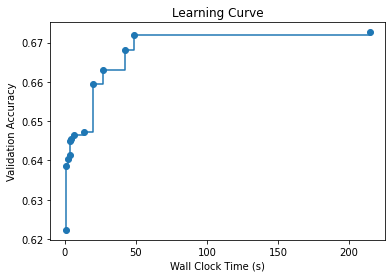

In [13]:
import matplotlib.pyplot as plt
import numpy as np

plt.title('Learning Curve')
plt.xlabel('Wall Clock Time (s)')
plt.ylabel('Validation Accuracy')
plt.scatter(time_history, 1 - np.array(valid_loss_history))
plt.step(time_history, 1 - np.array(best_valid_loss_history), where='post')
plt.show()

## 3. Comparison with alternatives


### Default LightGBM

In [14]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier()

In [15]:
lgbm.fit(X_train, y_train)

LGBMClassifier()

In [16]:
y_pred_lgbm = lgbm.predict(X_test)

### Default XGBoost

In [17]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
cat_columns = X_train.select_dtypes(include=['category']).columns
X = X_train.copy()
X[cat_columns] = X[cat_columns].apply(lambda x: x.cat.codes)
y_train = y_train.astype('int')
y_test_xgb = y_test.astype('int')

In [18]:
xgb.fit(X, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [19]:
X = X_test.copy()
X[cat_columns] = X[cat_columns].apply(lambda x: x.cat.codes)
y_pred_xgb = xgb.predict(X)


In [20]:
print('default xgboost accuracy', '=', 1 - sklearn_metric_loss_score('accuracy', y_pred_xgb, y_test_xgb))
print('default lgbm accuracy', '=', 1 - sklearn_metric_loss_score('accuracy', y_pred_lgbm, y_test))
print('flaml (10 min) accuracy', '=', 1 - sklearn_metric_loss_score('accuracy', y_pred, y_test))

default xgboost accuracy = 0.6676060098186078
default lgbm accuracy = 0.6602346380315323
flaml (10 min) accuracy = 0.6732939797991784
